In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')


In [3]:
df=pd.read_csv('./data/TSLA.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-01,1.379333,1.383333,1.354000,1.373333,1.373333,8965500
1,2010-10-04,1.362000,1.411333,1.353333,1.399333,1.399333,9654000
2,2010-10-05,1.410000,1.418667,1.400667,1.408000,1.408000,4980000
3,2010-10-06,1.404000,1.417333,1.354667,1.364000,1.364000,4701000
4,2010-10-07,1.371333,1.376000,1.356000,1.362000,1.362000,2115000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3113,2023-02-14,191.940002,209.820007,189.440002,209.250000,209.250000,216455700
3114,2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
3115,2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500
3116,2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200
3117,2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600


In [9]:
df['Date'] = pd.to_datetime(df['Date']) #Convert the date column to datetime format

df = df.set_index('Date') #set the date column as the index

df = df.sort_index() #sort the dataframe by the index

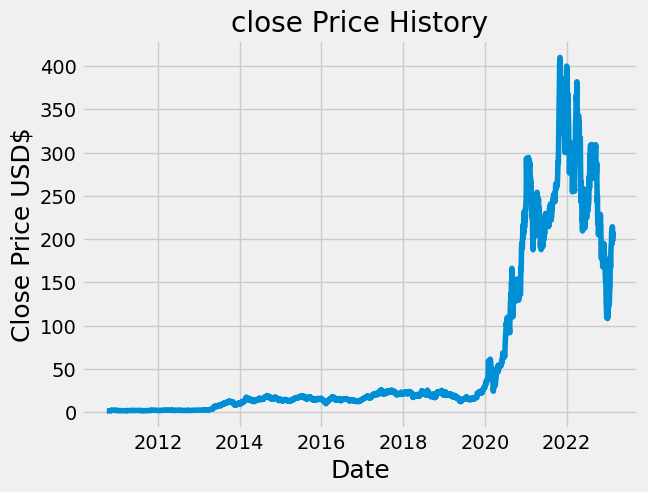

In [10]:
#Visualize the closind price history
plt.Figure(figsize=(16,20))
plt.title('close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD$', fontsize=18)
plt.show()

In [11]:
import math

data = df.filter(['Close'])
dataset = data.values


training_data_len = math.ceil(len(dataset)*.8)

print(training_data_len)
print(dataset)

2495
[[  1.373333]
 [  1.399333]
 [  1.408   ]
 ...
 [202.039993]
 [208.309998]
 [197.369995]]


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.97283627e-05],
       [1.53355086e-04],
       [1.74564809e-04],
       ...,
       [4.91157498e-01],
       [5.06501339e-01],
       [4.79729165e-01]])

In [13]:
train_data = scaled_data[0:training_data_len,:]
print(training_data_len)
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<= 60:
        print(X_train)
        print(y_train)

2495
[array([8.97283627e-05, 1.53355086e-04, 1.74564809e-04, 6.68888163e-05,
       6.19944530e-05, 6.19944530e-05, 3.09960029e-05, 3.09960029e-05,
       7.99396361e-05, 1.14200179e-04, 7.99396361e-05, 2.93661799e-05,
       0.00000000e+00, 9.78872663e-05, 1.14200179e-04, 1.09305816e-04,
       1.30515539e-04, 2.13719716e-04, 1.54987356e-04, 1.85985806e-04,
       2.92029529e-04, 2.21876172e-04, 1.95774533e-04, 2.80608532e-04,
       7.91254587e-04, 7.16206867e-04, 8.04305407e-04, 7.47205317e-04,
       1.51888245e-03, 1.30353047e-03, 1.59719226e-03, 1.75381189e-03,
       1.56945835e-03, 1.54009217e-03, 1.60535117e-03, 1.78481034e-03,
       2.17799168e-03, 2.36887185e-03, 2.51570274e-03, 2.49123093e-03,
       2.32971694e-03, 2.49286075e-03, 2.33297903e-03, 2.00668896e-03,
       1.86638225e-03, 1.67387225e-03, 1.87780324e-03, 2.00995105e-03,
       1.95774533e-03, 1.87127661e-03, 1.71302716e-03, 1.38347255e-03,
       1.55803736e-03, 1.75544416e-03, 1.84517497e-03, 1.90064279e-03,


In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train.shape

(2435, 60)

In [17]:
X_train = np.reshape(X_train,(2435, 60, 1))
X_train.shape

(2435, 60, 1)

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1),))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
history = model.fit(X_train, y_train, epochs=4, batch_size=32)
history

Epoch 1/4
77/77 [==============================] - 19s 87ms/step - loss: 1.9205e-04
Epoch 2/4
77/77 [==============================] - 6s 83ms/step - loss: 4.9527e-05
Epoch 3/4
77/77 [==============================] - 6s 83ms/step - loss: 3.8780e-05
Epoch 4/4
77/77 [==============================] - 7s 88ms/step - loss: 3.5090e-05


In [22]:
test_data = scaled_data[training_data_len-60:,:]
# print(scaled_data)
X_test=[]
y_test=dataset[training_data_len:,:]
for i  in  range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])
X_test

[array([0.14122032, 0.15170405, 0.15019496, 0.16396118, 0.15544335,
        0.14931561, 0.15838975, 0.15695897, 0.15853495, 0.16052043,
        0.16002121, 0.15894772, 0.16016477, 0.15348723, 0.15758708,
        0.15330614, 0.16139979, 0.17289502, 0.17939146, 0.1939163 ,
        0.22049596, 0.22347826, 0.21956604, 0.22419937, 0.24873155,
        0.24096745, 0.24418795, 0.24895341, 0.24155151, 0.24158414,
        0.2647769 , 0.25259973, 0.25651032, 0.2435794 , 0.22790603,
        0.24790766, 0.23761156, 0.2413019 , 0.23940615, 0.23015092,
        0.23899992, 0.2393262 , 0.23900318, 0.23974713, 0.23373196,
        0.22816217, 0.2209544 , 0.25038094, 0.2611877 , 0.26603475,
        0.29620523, 0.30459907, 0.30320255, 0.32331839, 0.33117382,
        0.32533648, 0.32682762, 0.3480088 , 0.3619708 , 0.35783505]),
 array([0.15170405, 0.15019496, 0.16396118, 0.15544335, 0.14931561,
        0.15838975, 0.15695897, 0.15853495, 0.16052043, 0.16002121,
        0.15894772, 0.16016477, 0.15348723, 0.

In [23]:
X_test=np.array(X_test)

In [24]:
X_test

array([[0.14122032, 0.15170405, 0.15019496, ..., 0.3480088 , 0.3619708 ,
        0.35783505],
       [0.15170405, 0.15019496, 0.16396118, ..., 0.3619708 , 0.35783505,
        0.40322214],
       [0.15019496, 0.16396118, 0.15544335, ..., 0.35783505, 0.40322214,
        0.38424016],
       ...,
       [0.4376866 , 0.40753731, 0.41252958, ..., 0.47304837, 0.5088017 ,
        0.52101314],
       [0.40753731, 0.41252958, 0.44505261, ..., 0.5088017 , 0.52101314,
        0.4911575 ],
       [0.41252958, 0.44505261, 0.44422057, ..., 0.52101314, 0.4911575 ,
        0.50650134]])

In [25]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [26]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
predictions

20/20 [==============================] - 3s 33ms/step


array([[150.57484],
       [155.85695],
       [160.78543],
       [164.35158],
       [165.66446],
       [165.86555],
       [162.80525],
       [159.08672],
       [155.37988],
       [152.00139],
       [150.43915],
       [150.96155],
       [152.47899],
       [153.96397],
       [155.8717 ],
       [158.09969],
       [159.6218 ],
       [159.33092],
       [158.18999],
       [157.18001],
       [156.72206],
       [156.57057],
       [156.91104],
       [158.0836 ],
       [158.70573],
       [159.27026],
       [159.41054],
       [159.61745],
       [159.86357],
       [160.35324],
       [161.1969 ],
       [162.32108],
       [163.96446],
       [165.43684],
       [166.43488],
       [166.8163 ],
       [166.53809],
       [165.90395],
       [165.19316],
       [164.33762],
       [163.45064],
       [162.73956],
       [161.6408 ],
       [160.53465],
       [158.83615],
       [157.2728 ],
       [156.57993],
       [156.37256],
       [156.97643],
       [157.78464],


In [27]:
rmse=np.sqrt(np.mean(predictions-y_test)**
2)
rmse

51.58162860903328

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8344\799950370.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



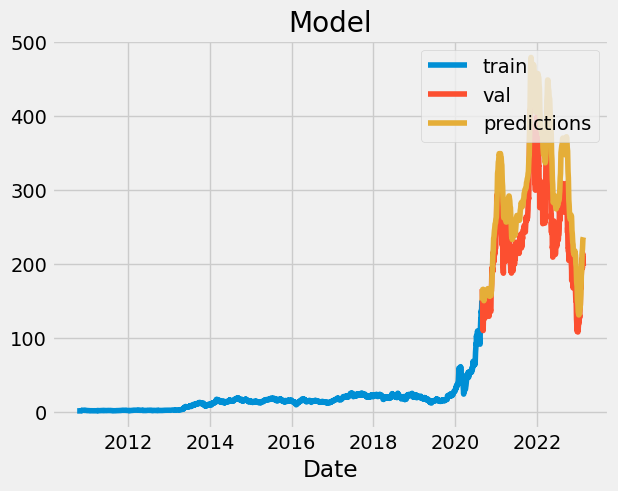

In [53]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions


plt.Figure(figsize=(20,18))
plt.title('Model')
plt.xlabel('Date')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper right')
plt.show()

In [29]:
loss = model.evaluate(X_test, y_test)

20/20 [==============================] - 2s 32ms/step - loss: 62642.7227


In [30]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

20/20 [==============================] - 1s 32ms/step


array([[150.57484],
       [155.85695],
       [160.78543],
       [164.35158],
       [165.66446],
       [165.86555],
       [162.80525],
       [159.08672],
       [155.37988],
       [152.00139],
       [150.43915],
       [150.96155],
       [152.47899],
       [153.96397],
       [155.8717 ],
       [158.09969],
       [159.6218 ],
       [159.33092],
       [158.18999],
       [157.18001],
       [156.72206],
       [156.57057],
       [156.91104],
       [158.0836 ],
       [158.70573],
       [159.27026],
       [159.41054],
       [159.61745],
       [159.86357],
       [160.35324],
       [161.1969 ],
       [162.32108],
       [163.96446],
       [165.43684],
       [166.43488],
       [166.8163 ],
       [166.53809],
       [165.90395],
       [165.19316],
       [164.33762],
       [163.45064],
       [162.73956],
       [161.6408 ],
       [160.53465],
       [158.83615],
       [157.2728 ],
       [156.57993],
       [156.37256],
       [156.97643],
       [157.78464],


In [31]:
actual_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

In [33]:
import plotly.graph_objs as go

In [10]:
df.index

RangeIndex(start=0, stop=3118, step=1)

In [49]:
time_steps=20

In [51]:
actual_trace = go.Scatter(
    x = df.index[training_data_len+time_steps+1:],
    y = actual_prices.flatten(),
    mode = 'lines',
    name = 'Actual'
)

predicted_trace = go.Scatter(
    x=df.index[training_data_len+time_steps+1:],
    y = predicted_prices.flatten(),
    mode = 'lines',
    name = 'Predicted'
)

# Create layout for the plot
layout = go.Layout(
    title = 'Actual vs. Predicted Apple Stock Prices (LSTM)',
    xaxis = dict(title = 'Date'),
    yaxis = dict(title = 'Price')
)

# Create figure and add traces
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Show the plot
fig.show()